### Today concepts
1. Multi Linear Regression(applying linear regression with multiple features)
2. Polynomial Regression(Polynomial Features)

#### Multi Linear Regression

**Applying Linear Regression for Boston house price data set for predict the price of house**

**1. Get The data**

sklearn package already contains some data sets for us to practice

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**we can convert this data into dataframe**

In [6]:
import pandas as pd

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)
C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)


In [11]:
df = pd.DataFrame(data['data'])
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [12]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
df.columns = data['feature_names']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [14]:
df['target'] = data['target']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**How many rows and how many columns in df**

In [18]:
df.shape

(506, 14)

**2. Pre-processing**

**is there any missing values?**

In [19]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

**simple information**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


**3. Train the model**

i am taking RM column  randomly as my features


we check the performance of model if not good we can combine with multiple features

In [21]:
X = df[['RM']]
y = df['target']

**It is better to seperate the data for training and testing**


70% for training

30% for testing

we are seperating X,y
	training X
	testing X
	training y
	testing y


In [22]:
from sklearn.model_selection import train_test_split

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


X_train,X_test,y_train,y_test  = train_test_split(X,y,train_size=0.7)

In [23]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,train_size=0.7)

In [24]:
X_train.shape  , y_train.shape

((354, 1), (354,))

In [26]:
X_test.shape , y_test.shape

((152, 1), (152,))

import linear regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

**train the model with training data**

In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Test the model**

**training score with training data**

In [30]:
model.score(X_train,y_train) * 100

48.17979875981927

**testing score with test data**

In [31]:
model.score(X_test,y_test) * 100

48.10078075493842

**5. Improve the model**

1. by giving more examples/more data to the model
2. by taking different features
3. by parameter tuning

**We can improve model by taking multiple features**

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**seperating the features**

**df.corr()  it gives co-relation information**

if target with feature 
    has + positive value near to 1 then the feature is positive linearity

    has - negative value near -1 then the feature is positive linearity
    
    has near 0 no relation

In [35]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**RM --> target   0.69 relation**

**LSTAT ---> target -0.737663 relation**


In [36]:
import seaborn as sns

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


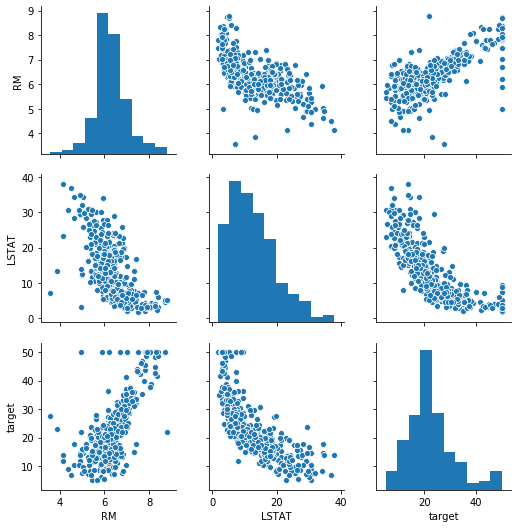

In [37]:
sns.pairplot(df[['RM','LSTAT','target']])

In [38]:
X = df[['RM','LSTAT']]
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**test the model**

In [40]:
print('training score' , model.score(X_train,y_train)*100)
print('testing score' , model.score(X_test,y_test)*100)

training score 64.08934582448802
testing score 62.69429066775033


#### Applying Polynomial features to linear Regression

* under fit

    model not able to recognize the pattern/
    (student not able to learn from the training data)

*  Overfit

        model performing good in training but not in testing
         
        (student biheart the data(not learning the pattern/logic) while training failed in testing)

* Best fit
        model working well in training as well as testing

**first we observe the score of model without polynomial features**

**with polynomial features and compare**

**Prediction of salary of employee with his experience**

**1.Get data**

In [41]:
experience = [0,1,2,3,4,5,6,7,8]

salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


**2. Pre-procession**

In [42]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
experience    9 non-null int64
salary        9 non-null int64
dtypes: int64(2)
memory usage: 184.0 bytes


In [44]:
X = df[['experience']]
y = df['salary']


In [45]:
X_train = X.head(7)
X_test = X.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [46]:
X_train

,experience
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [47]:
X_test

,experience
7,7
8,8


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print('training score',model.score(X_train,y_train)*100)
print('testing score',model.score(X_test,y_test) * 100)

training score 79.9249859786876
testing score -466.47551020408207


**ploting the linear line**

In [53]:
import matplotlib.pyplot as plt

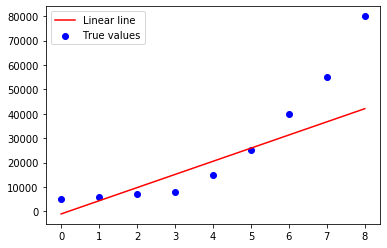

In [54]:
plt.figure()

plt.scatter(X['experience'],y,c='blue',label="True values")

plt.plot(X['experience'],model.predict(X),c='red',label="Linear line")
plt.legend()
plt.show()

**now we can apply polynomial features**

import the polynomial features

In [55]:
from sklearn.preprocessing import PolynomialFeatures

create the object for polynomial features with the higher order degree

In [56]:
poly = PolynomialFeatures(degree=2)

we transform the features/input data into higher order features

syntax
```
X_poly_train = poly.fit_transform(training features)

X_poly_test = poly.transform(testing features)
```

In [57]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_poly_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
'training score',model.score(X_poly_train,y_train)*100

('training score', 98.77079828005235)

In [62]:
'testing score',model.score(X_poly_test,y_test)*100

('testing score', 87.91836734693888)

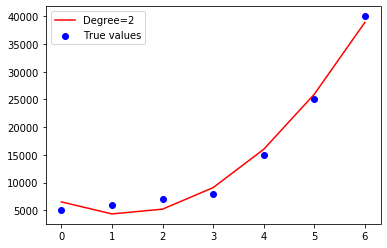

In [65]:
plt.figure()

plt.scatter(X_train['experience'],y_train,c='blue',label='True values')

plt.plot(X_train['experience'],model.predict(X_poly_train),c='red',label='Degree=2')
plt.legend()
plt.show()